# Code Goes Here

1237
809


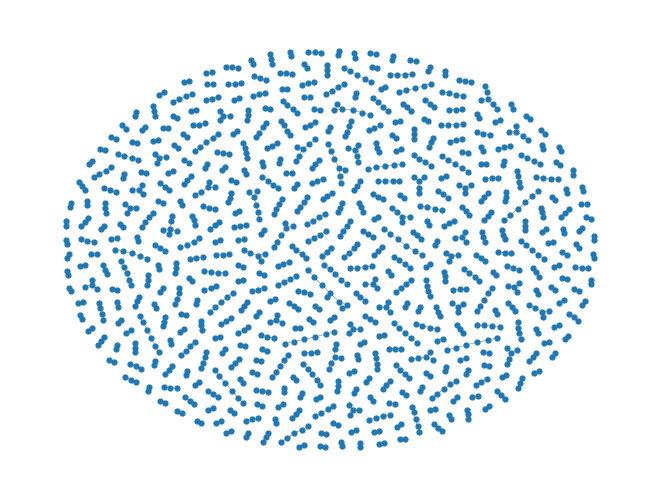

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Extract data
molecules = pd.read_csv('../data/e-coupling_with_nn_distance.txt', sep='\t')

# Create a Graph
G = nx.Graph()
G.add_nodes_from(molecules["Mol_i"])
G.add_edges_from(list(zip(molecules["Mol_i"], molecules["Mol_j_nearest"])))
# Alternate way to form list of tuples from pandas DataFrame
# list(molecules[["Mol_i", "Mol_j_nearest"]].itertuples(index=False, name=None))

# Set edge attributes
for i, (u, v) in enumerate(G.edges):
    G[u][v]['extracted_value'] = molecules['extracted_value'][i]
    G[u][v]['Distance_nm'] = molecules['Distance_nm'][i] 

# Checking number of nodes
print(len(G.nodes))
print(len(G.edges)) # Should divide by 2 as edges counted twice

# Visualize the graph
nx.draw(G, with_labels=False, font_weight='bold', node_size=12, width=0.2)

In [ ]:
# Find the largest connected component
max(nx.k_components(G)[1], key=len)

{89, 152, 538, 708, 924, 946, 954, 1029}

In [6]:
output_filename = "../output/graph_adj_values_raw.txt"

with open(output_filename, "w") as f:
    for n_view in nx.k_components(G)[1]: # n_view is an AtlasView object
        f.write(str(n_view) + "\n") # Convert the view to string and add newline

print(f"Raw G.adj.values() output written to {output_filename}")

Raw G.adj.values() output written to ../output/graph_adj_values_raw.txt


In [ ]:
for n in G.adj.values():
    print(n)

{698: {}}
{1080: {}}
{758: {}, 298: {}}
{1459: {}}
{1028: {}}
{16: {}, 1224: {}}
{1163: {}, 968: {}}
{405: {}}
{576: {}}
{180: {}}
{1442: {}}
{293: {}}
{828: {}}
{187: {}}
{300: {}}
{431: {}}
{81: {}}
{1287: {}}
{653: {}}
{1374: {}}
{714: {}}
{1178: {}}
{1440: {}}
{1005: {}}
{89: {}}
{581: {}}
{563: {}}
{878: {}, 226: {}}
{253: {}}
{1340: {}, 1208: {}}
{1048: {}, 641: {}}
{786: {}}
{174: {}}
{546: {}}
{140: {}}
{1242: {}}
{364: {}}
{1391: {}}
{1044: {}}
{1043: {}, 309: {}}
{34: {}}
{1487: {}}
{139: {}, 1278: {}}
{1034: {}}
{406: {}, 1148: {}}
{1292: {}, 334: {}}
{582: {}}
{1474: {}}
{753: {}}
{456: {}}
{497: {}}
{1068: {}}
{485: {}}
{817: {}, 744: {}}
{1409: {}}
{1197: {}}
{239: {}, 450: {}}
{533: {}}
{480: {}, 384: {}}
{201: {}}
{71: {}}
{1056: {}, 47: {}}
{434: {}}
{487: {}}
{166: {}, 893: {}}
{709: {}}
{13: {}}
{526: {}, 204: {}}
{852: {}}
{746: {}}
{1493: {}, 935: {}}
{394: {}, 120: {}}
{1001: {}}
{188: {}, 677: {}}
{392: {}, 1170: {}, 798: {}}
{999: {}}
{566: {}}
{1404: {}}
{1262: